In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
ecommerce = pd.read_csv('ecommerce.csv')

In [3]:
ecommerce.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Data Cleaning & Pre-processing

##### Dealing with Missing Data

In [5]:
ecommerce.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [13]:
ecommerce_clean = ecommerce.drop(columns=['Email','Address','Avatar'],inplace=True)

In [14]:
X = ecommerce[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = ecommerce['Yearly Amount Spent']

In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Model Training and Predicting

In [16]:
y_predict = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 103.92
R² Score: 0.98


In [18]:
for actual, predicted in zip(y_test, y_predict):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual: 401.03, Predicted: 403.67
Actual: 534.78, Predicted: 542.58
Actual: 418.60, Predicted: 427.07
Actual: 503.98, Predicted: 502.02
Actual: 410.07, Predicted: 410.12
Actual: 557.61, Predicted: 569.93
Actual: 538.94, Predicted: 531.93
Actual: 514.34, Predicted: 506.30
Actual: 408.62, Predicted: 408.72
Actual: 475.02, Predicted: 473.98
Actual: 427.20, Predicted: 441.47
Actual: 434.02, Predicted: 425.34
Actual: 411.19, Predicted: 425.13
Actual: 533.51, Predicted: 527.62
Actual: 447.37, Predicted: 431.46
Actual: 407.54, Predicted: 424.08
Actual: 573.85, Predicted: 575.77
Actual: 497.59, Predicted: 484.90
Actual: 466.42, Predicted: 458.36
Actual: 467.80, Predicted: 481.97
Actual: 510.40, Predicted: 502.32
Actual: 510.50, Predicted: 513.64
Actual: 511.98, Predicted: 507.59
Actual: 640.58, Predicted: 646.57
Actual: 444.29, Predicted: 450.24
Actual: 502.77, Predicted: 496.27
Actual: 551.62, Predicted: 556.40
Actual: 548.52, Predicted: 554.96
Actual: 390.10, Predicted: 399.64
Actual: 330.59

In [19]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['coefficients'])
print(coefficients)


                      coefficients
Avg. Session Length      25.724256
Time on App              38.597135
Time on Website           0.459148
Length of Membership     61.674732


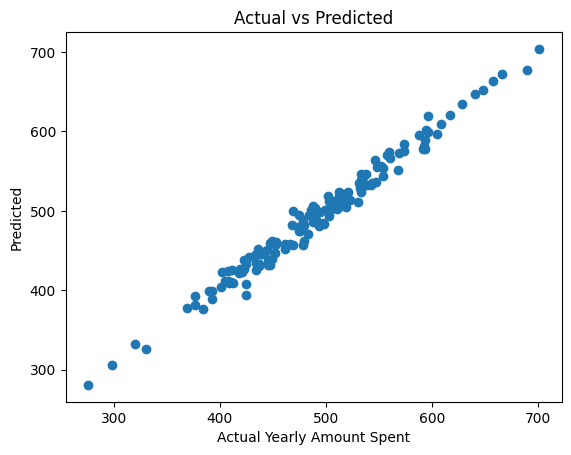

In [21]:

plt.scatter(y_test, y_predict)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()
